In [1]:
import sympy as sp
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
sp.init_printing() # doctest: +SKIP

In [5]:
from sympy.abc import X, Y, Z, sigma, rho, a, tau, W, U, V, t, omega, mu, p, q, theta, nu, gamma, alpha, beta, lamda

In [175]:
F = sp.Function("F")
P = sp.Function("P")
Alpha = sp.Function("A")
Beta = sp.Function("B")

In [139]:
D = gamma/2*(sigma**2*Y**2+omega**2)
D

In [140]:
mu = a*(Y-lamda)-gamma*V
mu

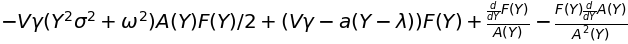

In [148]:
flux = -mu*F(Y)+(F(Y)/Alpha(Y)).diff(Y)-V*D*F(Y)*Alpha(Y)
flux

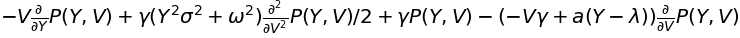

In [142]:
fk = -(mu*P(Y,V)).diff(V)-(V*P(Y,V)).diff(Y)+(D*P(Y,V)).diff(V,V)
fk

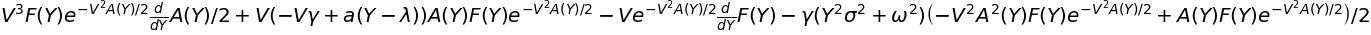

In [172]:
fk_1 = (mu*V*Alpha(Y)*F(Y)*sp.exp(-Alpha(Y)* V**2/2)) \
    -(V*F(Y)*sp.exp(-Alpha(Y)* V**2/2)).diff(Y) \
    -(D*(Alpha(Y)*F(Y)*sp.exp(-Alpha(Y)* V**2/2)- V**2*Alpha(Y)**2*F(Y)*sp.exp(-Alpha(Y)* V**2/2)))
fk_1

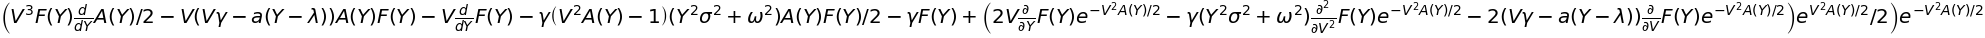

In [162]:
sp.simplify(fk_1 - fk.subs({P(Y,V): F(Y)*sp.exp(-Alpha(Y)* V**2/2)}))

In [163]:
sp.simplify(fk.subs({
#     P(Y,V): F(Y)*sp.exp(-Alpha(Y)* V**2/2), 
    (P(Y,V)).diff(V): -Alpha(Y)*V*P(Y,V)
}))

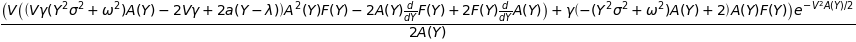

In [164]:
sp.simplify((flux*sp.exp(-Alpha(Y)* V**2/2)).subs({
#     F(Y)*sp.exp(-Alpha(Y)* V**2/2): P(Y,V)
}).diff(V))

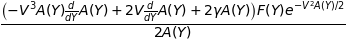

In [171]:
sp.simplify(((flux*sp.exp(-Alpha(Y)* V**2/2)).diff(V) - fk_1))

In [154]:
F(Y).diff(V)

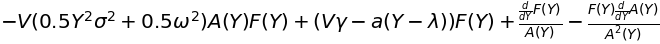

In [69]:
flux

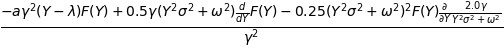

In [70]:
flux_c = sp.simplify(flux.subs({Alpha(Y): gamma/D}))
flux_c

In [71]:
integrand = sp.solve(flux_c, F(Y).diff(Y))[0]/F(Y)

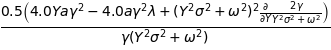

In [72]:
integrand

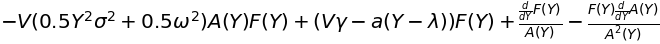

In [73]:
flux

In [75]:
soln = sp.integrate(integrand, Y)

In [76]:
simp_soln = sp.simplify(soln)

In [77]:
simp_soln

⎧                                   ⎛  1.0⋅Y   ⎞                              
⎪                     2.0⋅a⋅γ⋅λ⋅atan⎜──────────⎟                              
⎪                                   ⎜      ____⎟                              
⎪                                   ⎜     ╱  2 ⎟                              
⎪                                   ⎜    ╱  ω  ⎟                              
⎪                                   ⎜   ╱   ── ⎟                              
⎪             2                     ⎜  ╱     2 ⎟                              
⎪        1.0⋅Y ⋅a⋅γ                 ⎝╲╱     σ  ⎠          ⎛ 2  2    2⎞        
⎪        ────────── - ────────────────────────── - 1.0⋅log⎝Y ⋅σ  + ω ⎠        
⎪             2                      ____                                     
⎪            ω                      ╱  2                                      
⎪                            2     ╱  ω                                       
⎪                           σ ⋅   ╱   ──            

In [109]:
log_soln = -2*a*gamma*lamda*sp.atan(sigma*Y/sp.Abs(omega))/(sigma*sp.Abs(omega)) \
    +(a*gamma/sigma**2-1)*sp.log(sigma**2*Y**2+omega**2)

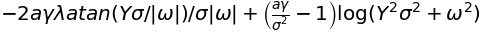

In [110]:
log_soln

In [111]:
norm_soln = (Y**2*sigma**2+omega**2)**(a*gamma/sigma**2-1) \ 
    *sp.exp(-2*a*gamma*lamda*sp.atan(sigma*Y/sp.Abs(omega))/(sigma*sp.Abs(omega)))

In [112]:
norm_soln

In [116]:
marg_soln = (Y**2*sigma**2+omega**2)**(a*gamma/sigma**2 - 1/2) \
    *sp.exp(-2*a*gamma*lamda*sp.atan(sigma*Y/sp.Abs(omega))/(sigma*sp.Abs(omega)))

In [117]:
marg_soln

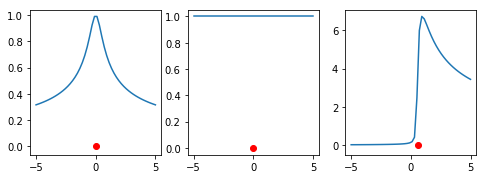

In [126]:
opts = [
    {
        a: 1,
        sigma: 2,
        tau: -1,
        rho: 0,
        gamma: 1
    },
    {
        a: 1,
        sigma: np.sqrt(2),
        tau: -1,
        rho: 0,
        gamma: 1
    },
    {
        a: 1,
        sigma: 2,
        tau: -1,
        rho: 0.95,
        gamma: 1
    },
]
width = 8
fig, axes = plt.subplots(1, len(opts), figsize=(width,width/len(opts)))
for ax, opts in zip(axes, opts):
    g_l = sp.lambdify(X, marg_soln.subs({
        lamda: tau*rho/sigma,
        omega: tau*sp.sqrt(1-rho**2),
        Y: X+tau*rho/sigma
    }).subs(opts),"numpy")

    x = np.linspace(-5,5,50)
    ax.plot(x, g_l(x))

    mode= a*mu/(a-sigma**2)

    mm = float((mode-tau*rho/sigma).subs({
        mu: tau*rho/sigma,
        omega: tau*sp.sqrt(1-rho**2),
    }).subs(opts))
    ax.scatter([mm], [0] , color="r")
plt.show()

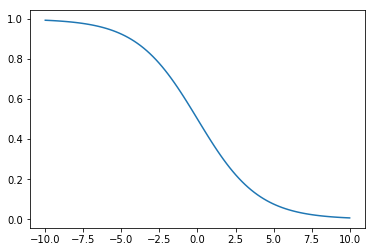

In [132]:
from scipy.special import expit
xx = np.linspace(-10,10, 100)
yy = expit(-xx/2)
plt.plot(xx,yy)

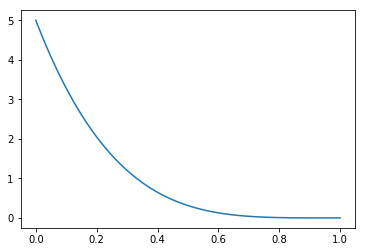

In [138]:
from scipy.stats import beta
xx = np.linspace(0,1, 100)
yy = beta.pdf(xx, 1, 5)
plt.plot(xx,yy)

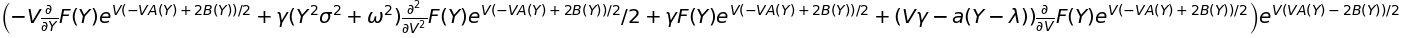

In [177]:
fk_n = fk.subs({
    P(Y,V): F(Y)*sp.exp(-Alpha(Y)* V**2/2+Beta(Y)*V)
})
sp.simplify(fk_n/sp.exp(-Alpha(Y)* V**2/2+Beta(Y)*V))

In [180]:
sp.simplify(fk_n/sp.exp(-Alpha(Y)* V**2/2+Beta(Y)*V)).coeff(V**2)

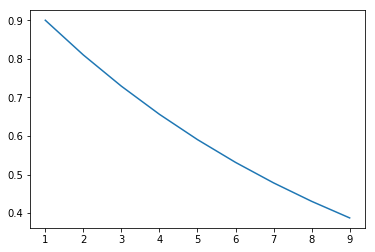

In [196]:
xx = np.arange(1,10, 1)
p = 0.9
yy = p**xx
plt.plot(xx,yy)

In [183]:
(1-p_ic**w)*p_m**l*f**a

array([1, 2, 3, 4, 5, 6, 7, 8, 9])